# Статистика, занятие 13

Составитель: Ҳакимов Раҳматҷон. Email: rahmatjon@gmail.com. Telegram: https://t.me/rahmatjon_hakimov

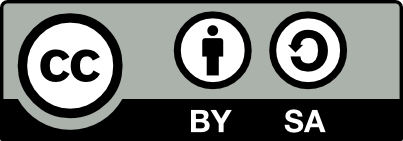

### **Нелинейная регрессия**

Нелинейная регрессия используется, когда данные не соответствуют линейной зависимости. В таких случаях вместо прямой линии тренда мы можем использовать нелинейные модели, например, полиномиальные функции или логистические кривые.

### Пример нелинейной регрессии на Python:

1. Мы создадим данные, которые имеют квадратичную зависимость (параболу).
2. Проведём нелинейную регрессию с использованием полиномиальной модели 2-й степени.

### Пример кода:

Этот код покажет график, на котором данные имеют квадратичную зависимость, а также модель, которая описывает эту зависимость с помощью полиномиальной регрессии.

Среднеквадратичная ошибка (MSE): 4.47


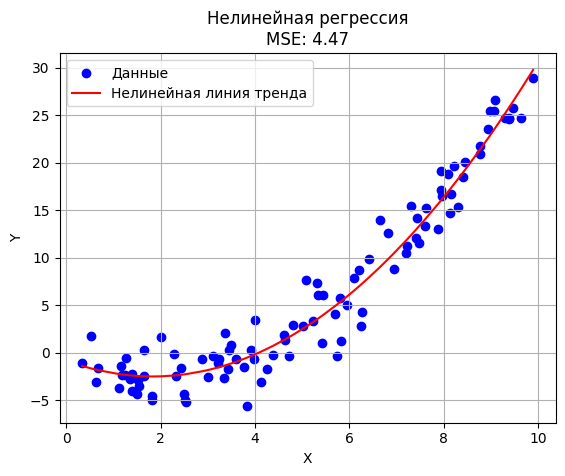

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Генерация нелинейных данных
# np.random.seed(42)
x = np.random.rand(100) * 10  # 100 случайных точек от 0 до 10
y = 0.5 * x**2 - 2 * x + np.random.randn(100) * 2  # квадратичная зависимость с шумом

# Преобразование данных для полиномиальной регрессии (2-я степень)
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x.reshape(-1, 1))

# Построение модели линейной регрессии на полиномиальных данных
model = LinearRegression()
model.fit(x_poly, y)

# Предсказание
y_pred = model.predict(x_poly)

# Вычисление ошибки
mse = mean_squared_error(y, y_pred)
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")

# График
plt.scatter(x, y, label="Данные", color="blue")
plt.plot(np.sort(x), y_pred[np.argsort(x)], color='red', label="Нелинейная линия тренда")
plt.title(f"Нелинейная регрессия\nMSE: {mse:.2f}")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

### Объяснение кода:
- Мы генерируем данные, где зависимость между переменными имеет квадратичный вид: $y = 0.5x^2 - 2x$ с добавлением шума.
- Используем полиномиальные признаки 2-й степени с помощью `PolynomialFeatures`.
- Модель линейной регрессии обучается на полиномиальных данных, и затем предсказываются значения.
- Мы отображаем график с точками данных и нелинейной линией тренда (красная кривая).

### **Мультиколлинеарность**

Мультиколлинеарность — это ситуация, когда две или более независимые переменные в модели линейной регрессии сильно коррелируют друг с другом. Это может привести к нестабильности оценок коэффициентов регрессии и затруднить интерпретацию модели.

### Методы диагностики мультиколлинеарности:

1. **Матрица корреляции**: Проверка на сильные корреляции между независимыми переменными.
2. **VIF (Variance Inflation Factor)**: Фактор увеличения дисперсии, который количественно оценивает степень мультиколлинеарности. Значения VIF выше 5-10 указывают на наличие мультиколлинеарности.

In [2]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps


,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.347533,0.398948,0.455743,0.072914,-0.233402,-0.731222,0.477978,-0.442621,0.015185
1,0.347533,1.000000,-0.284056,0.571003,-0.285483,0.382480,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1.000000,-0.523649,0.152937,-0.139176,-0.092895,0.016266,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1.000000,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.446650
4,0.072914,-0.285483,0.152937,-0.225343,1.000000,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.382480,-0.139176,-0.227577,-0.104438,1.000000,-0.030252,0.417640,0.205851,0.095084
6,-0.731222,-0.362842,-0.092895,-0.481548,-0.147477,-0.030252,1.000000,-0.494440,0.381407,-0.353652
7,0.477978,0.642578,0.016266,0.473286,-0.523283,0.417640,-0.494440,1.000000,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1.000000,0.150421
9,0.015185,0.190047,-0.383585,0.446650,-0.189916,0.095084,-0.353652,0.417863,0.150421,1.000000


In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Генерация данных
np.random.seed(42)
n_samples = 100

# Создаем независимые переменные
X1 = np.random.rand(n_samples) * 10
X2 = 0.8 * X1 + np.random.rand(n_samples)  # Высокая корреляция с X1
X3 = np.random.rand(n_samples) * 5
X4 = np.random.rand(n_samples) * 2

In [15]:
# Создаем DataFrame
data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4})

# Шаг 1: Проверка матрицы корреляции
correlation_matrix = data.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')

,X1,X2,X3,X4
X1,1.000000,0.992447,-0.037654,-0.211882
X2,0.992447,1.000000,-0.055491,-0.212613
X3,-0.037654,-0.055491,1.000000,-0.214816
X4,-0.211882,-0.212613,-0.214816,1.000000


In [11]:
# Шаг 2: Расчет VIF для каждой переменной
def calculate_vif(X):
    vif = pd.Series([1 / (1 - sm.OLS(X.iloc[:, i], sm.add_constant(X.drop(X.columns[i], axis=1))).fit().rsquared) 
                     for i in range(X.shape[1])], index=X.columns)
    return vif

# Расчет VIF
calculate_vif(data)

X1    67.870503
X2    68.142806
X3     1.082893
X4     1.107864
dtype: float64

### Описание кода:

1. **Генерация данных**: Создаём 4 независимые переменные, из которых `X2` сильно коррелирует с `X1`.
2. **Матрица корреляции**: Вычисляем корреляцию между независимыми переменными с помощью метода `corr()` в `pandas`.
3. **Расчет VIF**:
   - Функция `calculate_vif` рассчитывает VIF для каждой переменной, выполняя регрессию одной переменной на остальные.
   - VIF для каждой переменной вычисляется по формуле $VIF = \dfrac{1}{1 - R^2}$, где $R^2$ — это коэффициент детерминации при регрессии.

### Интерпретация результатов:
- **Матрица корреляции**: Смотрим на значения, близкие к 1 или -1, чтобы выявить пары переменных с высокой корреляцией.
- **VIF**: Если VIF для переменной превышает 5-10, это сигнализирует о наличии мультиколлинеарности.

Этот код позволяет выявить мультиколлинеарность в данных, а также интерпретировать результаты анализа.